In [1]:
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

453 340 RGB PNG


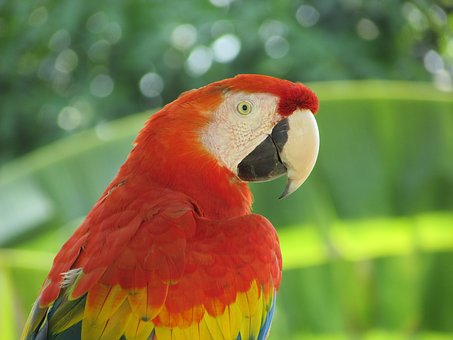

In [2]:
im = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png')
print(im.width, im.height, im.mode, im.format)
im

### Cropping

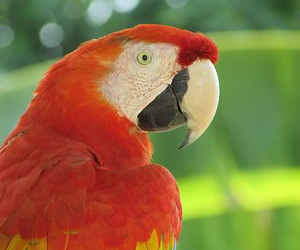

In [3]:
im_c = im.crop((100,50, 400, 300)) # Crop the rectangle given by left, top, right, bottom
im_c

### Resizing image

In [4]:
im = Image.open("./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png")
print(im.width, im.height)
## Resizing 
im_small = im.resize((im.width//5, im.height//5))
im_small.show()

453 340


### Negating an image

In [59]:
## TO negate an image we use the point function to transform each pixel value with a single argument function.
im_t = im.point(lambda x: 255-x)
im_t.show()

In [60]:
img_g = im.convert('L') ## RGB to grayscale
img_g.show()

### Log transformation

Compress dynamic range of intensities. Log transformation is used when an image has too bright or dark regions
It's defined by the formula 
s=c⋅log(1+r)

r = original pixel intensity (normalized, or in the range 0–255).
s = new transformed intensity.
c = scaling constant so that the resulting values do not exceed the valid range.


For example with a gray pixel f(50)=255⋅log(1+25550​)=255⋅log(1.196)≈255⋅0.179=45.7



In [7]:
img_g.point(lambda x: 255*np.log(1+x/255)).show()

### Geometric transformations

In [9]:
im.transpose(Image.FLIP_LEFT_RIGHT).show()

### Rotating an image


In [10]:
im_45 = im.rotate(45)
im_45.show()

In [ ]:
im.rotate(90).show()

In [12]:
im.transform((int(1.4*im.width), im.height), Image.AFFINE, data=(1,-0.5,0,0,1,0)).show()

### Perspective transformation

In [13]:
params = [1, 0.1,0,-0.1, 0.5, 0, -0.005, -0.001]
im.transform((im.width//3, im.height), Image.PERSPECTIVE, params, Image.BICUBIC).show()

### Adding salt and pepper to an image using putpixel

In [15]:
im_pp = im.copy()
n = 5000 # Choosing 5000 random points inside image

x, y = np.random.randint(0,im.width,n), np.random.randint(0, im.height, n)

for x,y in zip(x,y):
    im_pp.putpixel((x,y), ((0,220,255) if np.random.rand() <0.5 else (255,255,255)))
im_pp.show()

### Drawing on an image

In [20]:
draw = ImageDraw.Draw(im)
draw.ellipse((125,125,200,250), fill=(255,255,255,128))
del draw
im.show()

### Creating a thumbnail

In [24]:
im_thumb = im.copy()
im_thumb.thumbnail((100,100))
im.paste(im_thumb, (120,120))
im.show()



### Computing basic statistics of image

In [28]:
## Calculating median 

mean = np.mean(im)
std = np.std(im)
max_intensity = np.max(im)
min_intensity = np.min(im)

print(f"Mean intensity {mean}")

print(f"Standard deviation intensity {std}")

print(f"Max intensity {max_intensity}")

print(f"Min intensity {min_intensity}")


Mean intensity 111.8612604423668
Standard deviation intensity 57.365585663165184
Max intensity 255
Min intensity 0


### Plotting histograms of pixel values for a RGB image

<BarContainer object of 256 artists>

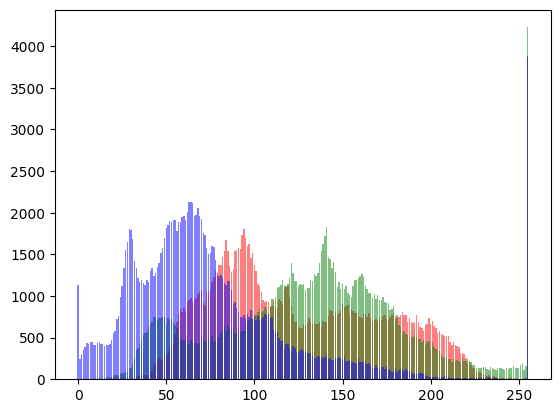

In [46]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color = 'r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color = 'g', alpha=0.5)
plt.bar(range(256), pl[2*256:], color = 'b', alpha=0.5)

### Separating channels

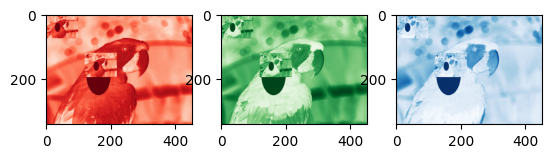

In [52]:
r, g, b = im.split()
plt.subplot(1,3,1); plt.imshow(r, cmap=plt.cm.Reds)
plt.subplot(1,3,2); plt.imshow(g, cmap=plt.cm.Greens)
plt.subplot(1,3,3); plt.imshow(b,cmap=plt.cm.Blues)

### Combining multiple channels of an image

In [56]:
im = Image.merge('RGB', (b,r,g))
im.show()

### Blending two images

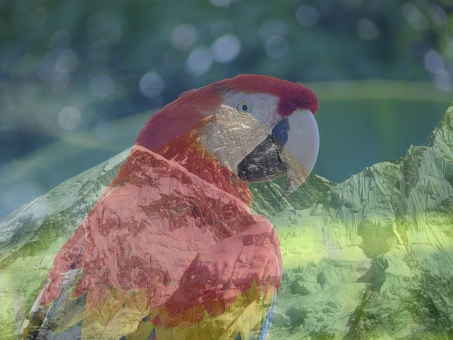

In [58]:
im1 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png')
im2 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/hill.png')

im1.convert('RGBA')
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR)
im_blend = Image.blend(im1,im2, alpha=0.5)
im_blend


### Superimposing two images

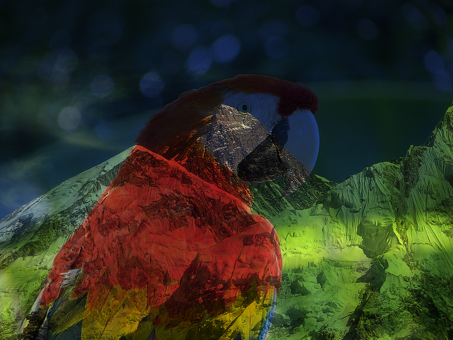

In [64]:
from PIL.ImageChops import multiply, add
im1 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png')
im2 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/hill.png').convert('RGB').resize((im1.width, im1.height))

multiply(im1, im2)

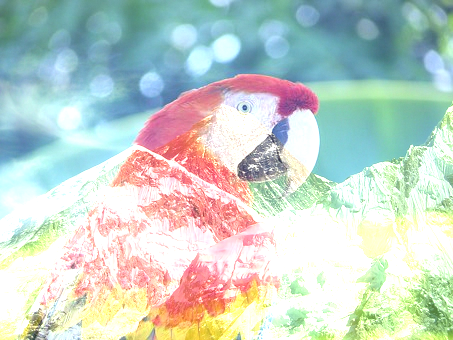

In [65]:
im1 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png')
im2 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/hill.png').convert('RGB').resize((im1.width, im1.height))

add(im1, im2)

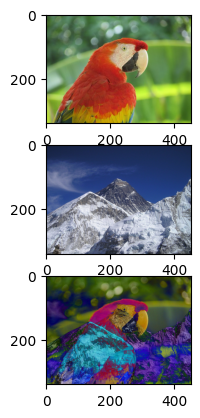

In [68]:
from PIL.ImageChops import subtract, multiply, screen, difference, add
im1 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/parrot.png')
im2 = Image.open('./image_test/Hands-On-Image-Processing-with-Python-Second-Edition/Chapter01/images/hill.png').convert('RGB').resize((im1.width, im1.height))


im_s = difference(im1, im2)
im_s

plt.subplot(3,1,1)
plt.imshow(im1)
plt.subplot(3,1,2)
plt.imshow(im2)
plt.subplot(3,1,3)
plt.imshow(im_s)